In [56]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch.autograd import Variable
import torch.nn as nn
from torch.nn import init
import torch.nn.functional as F
from torch.utils.data import DataLoader
import time
import random
import copy
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from pytorchtools import EarlyStopping
from datetime import datetime
# # 设置中文和负号正常显示
plt.rcParams['font.sans-serif'] = 'Microsoft YaHei'
plt.rcParams['axes.unicode_minus'] = False

In [62]:
# 函数定义
# Draw Plot-----绘图函数
def plot_df(df2, x, y, title="", xlabel='Date_Hour', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

# 20200531233500转日期字符串
def stamp_to_date(x):
    if np.isnan(x):
        return np.nan
    else:
        string = str(x)
        s = string[0:4] + "-" + string[4:6] + "-" + string[6:8] + " " + string[8:10] + ":" + string[10:12] + ":" +string[12:14]
        return s

In [63]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [64]:
# 导入数据
df = pd.read_excel(r"F:\实验室\电网项目\原始数据.xlsx")

In [65]:
df["日期"] = df["DATA_DT"].apply(stamp_to_date)
df['日期'] =  pd.to_datetime(df['日期'], format='%Y-%m-%d %H:%M:%S')

In [68]:
df2 = df[["日期","内存负载","主机CPU平均负载"]]
data = copy.deepcopy(df2)

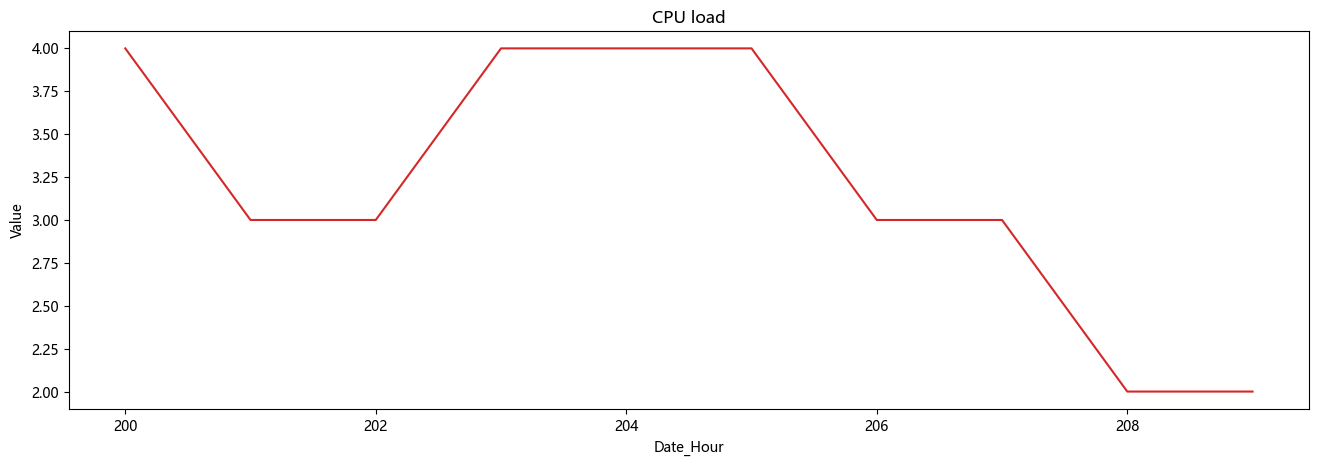

In [70]:
# 展示区间[index1:index1+index_val]
index1 = 200
index_val = 10
plot_df(data, x=(data.index)[index1:index1+index_val], y=(data["主机CPU平均负载"])[index1:index1+index_val], title='CPU load')